In [117]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

Response: imdb_score

In [118]:
movies = pd.read_csv('movie_metadata.csv')

In [119]:
movies['good_movie'] = movies['imdb_score'].apply(lambda x: 1 if x >= 7 else 0)

In [120]:
missing_values_sum = movies.isna().sum()
print(missing_values_sum)

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
good_movie                     0
dtype: int64


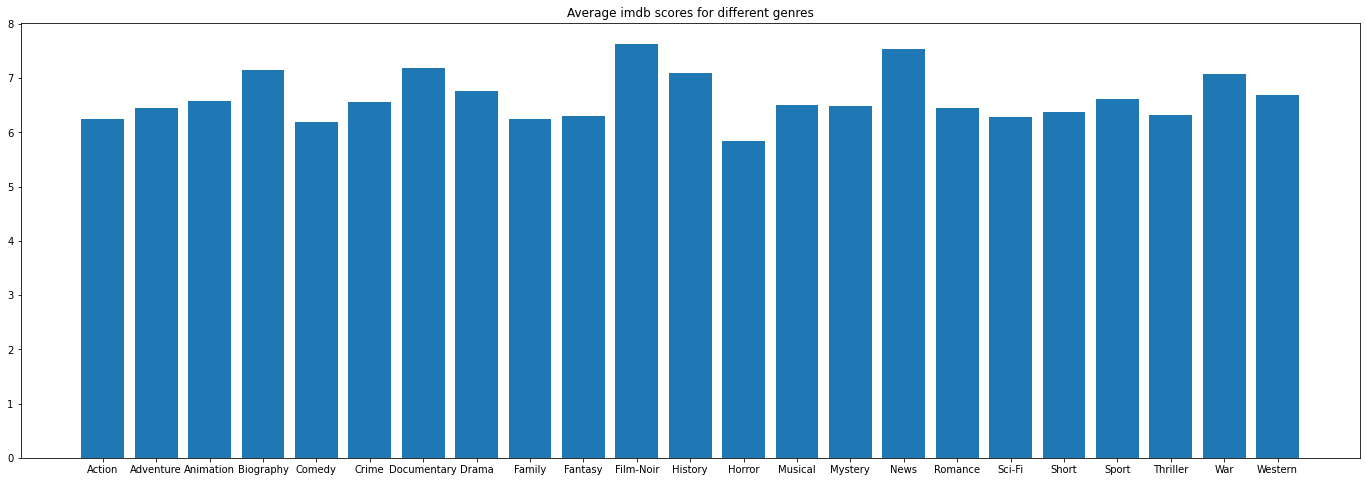

In [121]:
genres_df = movies.loc[:, ["genres", "imdb_score"]].copy()

genres_df["Action"] = [1 if "Action" in genre else 0 for genre in genres_df["genres"]]
genres_df["Adventure"] = [1 if "Adventure" in genre else 0 for genre in genres_df["genres"]]
genres_df["Animation"] = [1 if "Animation" in genre else 0 for genre in genres_df["genres"]]
genres_df["Biography"] = [1 if "Biography" in genre else 0 for genre in genres_df["genres"]]
genres_df["Comedy"] = [1 if "Comedy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Crime"] = [1 if "Crime" in genre else 0 for genre in genres_df["genres"]]
genres_df["Documentary"] = [1 if "Documentary" in genre else 0 for genre in genres_df["genres"]]
genres_df["Drama"] = [1 if "Drama" in genre else 0 for genre in genres_df["genres"]]
genres_df["Family"] = [1 if "Family" in genre else 0 for genre in genres_df["genres"]]
genres_df["Fantasy"] = [1 if "Fantasy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Film-Noir"] = [1 if "Film-Noir" in genre else 0 for genre in genres_df["genres"]]
genres_df["History"] = [1 if "History" in genre else 0 for genre in genres_df["genres"]]
genres_df["Horror"] = [1 if "Horror" in genre else 0 for genre in genres_df["genres"]]
genres_df["Musical"] = [1 if "Musical" in genre else 0 for genre in genres_df["genres"]]
genres_df["Mystery"] = [1 if "Mystery" in genre else 0 for genre in genres_df["genres"]]
genres_df["News"] = [1 if "News" in genre else 0 for genre in genres_df["genres"]]
genres_df["Romance"] = [1 if "Romance" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sci-Fi"] = [1 if "Sci-Fi" in genre else 0 for genre in genres_df["genres"]]
genres_df["Short"] = [1 if "Short" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sport"] = [1 if "Sport" in genre else 0 for genre in genres_df["genres"]]
genres_df["Thriller"] = [1 if "Thriller" in genre else 0 for genre in genres_df["genres"]]
genres_df["War"] = [1 if "War" in genre else 0 for genre in genres_df["genres"]]
genres_df["Western"] = [1 if "Western" in genre else 0 for genre in genres_df["genres"]]


means = []
for column in genres_df.columns[2:]:
    means.append(genres_df.loc[genres_df[column] == 1, "imdb_score"].mean())

    
fig, ax = plt.subplots(figsize=(24, 8))
plt.bar(x=genres_df.columns[2:], height=means)
plt.title("Average imdb scores for different genres")
plt.show()

In [122]:
movies['country'] = pd.Categorical(movies['country'])

movies['country'] = movies['country'].cat.add_categories('Others')

movies.loc[~movies['country'].isin(['USA', 'UK']), 'country'] = 'Others'

movies['country'] = pd.Categorical(movies['country'])

In [123]:
movies['other_actors_facebook_likes'] = movies['actor_2_facebook_likes'] + movies['actor_3_facebook_likes']

In [124]:
# Create dummy variables for the 'country' column
dummies = pd.get_dummies(movies['country'], prefix = 'country')

# Add the dummy variables to the original DataFrame
movies = pd.concat([movies, dummies], axis=1)

# Drop the original 'country' column
movies.drop('country', axis=1, inplace=True)

In [125]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_United Arab Emirates,country_West Germany,country_Others
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,1,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,1,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,0,0,0,0,0,1,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0,0,0,0,0,0,1,0,0,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,0,0,0,0,0,0,0,0,0,1
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,0,0,0,0,0,0,1,0,0,0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,0,0,0,0,0,0,1,0,0,0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,0,0,0,0,0,0,1,0,0,0


In [126]:
movies.corrwith(movies.imdb_score).sort_values(ascending = False)

imdb_score                      1.000000
good_movie                      0.721942
num_voted_users                 0.410965
num_critic_for_reviews          0.305303
num_user_for_reviews            0.292475
                                  ...   
country_Taiwan                       NaN
country_Thailand                     NaN
country_Turkey                       NaN
country_United Arab Emirates         NaN
country_West Germany                 NaN
Length: 84, dtype: float64

In [134]:
def confusion_matrix_train(model,cutoff=0.44):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))

In [135]:
logit_model = sm.logit(formula= 'good_movie ~ duration + title_year + director_facebook_likes + actor_1_facebook_likes + other_actors_facebook_likes + country_UK + country_USA + country_Others', data = movies).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.576982
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             good_movie   No. Observations:                 4906
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                            7
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.1005
Time:                        23:14:28   Log-Likelihood:                -2830.7
converged:                       True   LL-Null:                       -3146.9
Covariance Type:            nonrobust   LLR p-value:                2.549e-132
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      42.2308        nan        nan        nan         nan         nan
duration                        0.0239      0.002     14.263      0.000       0.021       0.027
title_year                     -0.0297      0.003    -11.160      0.000      -0.035      -0.024
director_facebook_likes      7.744e-05   1.19e-05      6.489      0.000    5.41e-05       0.000
actor_1_facebook_likes       5.803e-06   2.59e-06      2.237      0.025     7.2e-07    1.09e-05
other_actors_facebook_likes  1.038e-05   6.66e-06      1.558      0.119   -2.68e-06    2.34e-05
country_UK                     14.4134        nan        nan        nan         nan         nan
country_USA                    13.5810        nan        nan        nan         nan         nan
country_Others                 14.2364        nan        nan        nan         nan         nan
===============================================================================================
"""

Classification accuracy = 72.1%
Precision = 64.3%
TPR or Recall = 40.9%
FNR = 59.1%
FPR = 11.7%


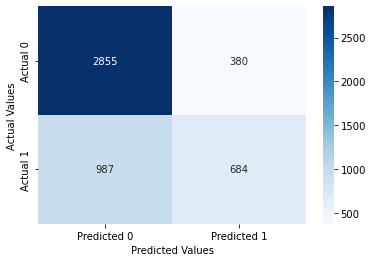

In [136]:
confusion_matrix_train(logit_model)